# Activation functions and Data Preprocessing

Source: Stanford University School of Engineering lecture `https://youtu.be/wEoyxE0GP2M`

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## Sigmoid

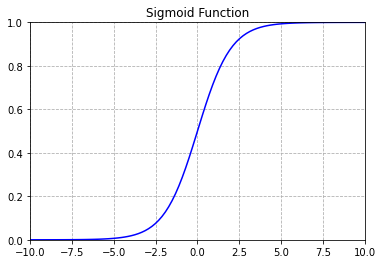

In [12]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
x=np.linspace(-10,10,10)
y=np.linspace(-10,10,100)
fig = plt.figure()
plt.plot(y,sigmoid(y),'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.title('Sigmoid Function')
plt.ylim(0, 1)
plt.xlim(-10, 10)
plt.show()

### What is does
    1. Squashes numbers to range [0, 1]
    2. Historically popular since they have nice interpretation as a saturating "firing rate" of a neuron

### Problems
<h4>1. Saturated neurons "kill" the gradients</h4> 

    Very negative or high positive numbers will return local gradient near 0 (graph is almost flat) => we want zero-mean data
<h4>2. Sigmoid outputs are not zero-centered</h4>    
<h4>3. exp() is a bit compute expensive</h4> 
<h4>4. Zero-mean data is prefered</h4> 
    
    If input is always positive, then local gradients are always positive too (dL/dw = dL/df * df/dw where df/dw = x) Therefore, we can move only in two directions: increasing or decreasing model parameters => we want zero-mean data
Example of inefficient gradient update:
<img src="./data/sigmoid1.png" width='300' height='300'>

## Tanh

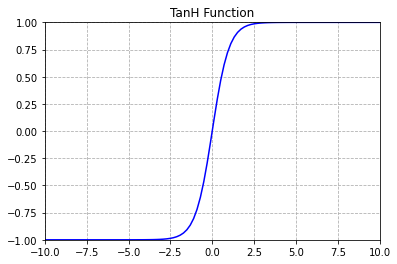

In [14]:
tanh = lambda x: 2*sigmoid(2*x)-1
x=np.linspace(-10,10,10)
y=np.linspace(-10,10,100)
plt.plot(y,tanh(y),'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.title('TanH Function')
plt.ylim(-1, 1)
plt.xlim(-10, 10)
plt.show()

### What it does
    1. Squashes numbers to range [-1, 1]
    2. Zero centered (nice)

### Problems
<h4>1. Still kills gradients</h4>

## ReLU (Rectified Linear Unit)

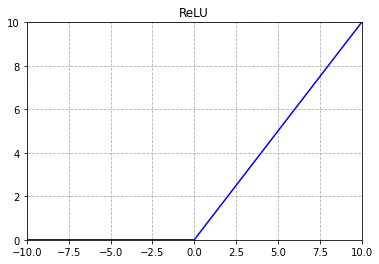

In [15]:
relu = lambda x: np.where(x>=0, x, 0)
x=np.linspace(-10,10,10)
y=np.linspace(-10,10,1000)
plt.plot(y,relu(y),'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.title('ReLU')
plt.ylim(0, 10)
plt.xlim(-10, 10)
plt.show()

### What it does 
    1. Does not saturate (x > 0)
    2. Very computationally efficient 
    3. Converges much faster than sigmoid / tanh in practice 
    4. More biologically plausible than sigmoid 

### Problems 
    1. Not zero-centered output 
    2. Kills gradients when x < 0
    3. Dead ReLU:
    Bad initialization: if we have bad weights, it will never activate 
    => People like to initialize ReLU neurons with slightly positive biases (e.g. 0.01)

## Leaky ReLU
### f(x) = max(0.01x, x)

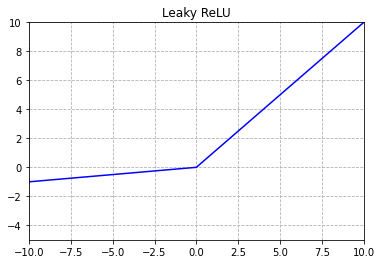

In [18]:
leakyrelu = lambda x: np.where(x>=0, x, 0.1*x)
x=np.linspace(-10,10,10)
y=np.linspace(-10,10,1000)
plt.plot(y,leakyrelu(y),'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.title('Leaky ReLU')
plt.ylim(-5, 10)
plt.xlim(-10, 10)
plt.show()

### What it does 
    1. Does not saturate 
    2. Computationally efficient 
    3. Confereges much faster than sigmoid / tanh 
    3. Will not "die"

## Parametric Rectifier 
### f(x) = max(ax, x)

### What it does
    1. All the same including the backpropagation into \alpha parameter 

## ELU (Exponential Linear Units)
<img src="./data/elu.png" width='300' height='300'>

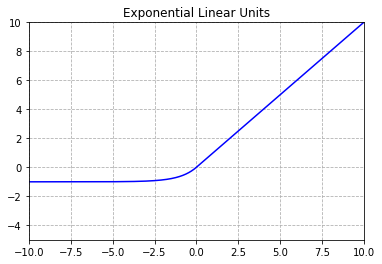

In [6]:
elu = lambda x: np.where(x>=0, x, 1*(np.exp(x) - 1))
x=np.linspace(-10,10,10)
y=np.linspace(-10,10,1000)
plt.plot(y,elu(y),'b', label='linspace(-10,10,100)')
plt.grid(linestyle='--')
plt.title('Exponential Linear Units')
plt.ylim(-5, 10)
plt.xlim(-10, 10)
plt.show()

### What it does
    1. All benefits of ReLU 
    2. Closer to zero-mean outputs 
    3. Negative saturation regime compared with Leaky ReLU adds some robustness to noise 

### Problems 
    1. Requires exp()

## Maxout "Neuron"
<img src="./data/maxout.png" width='300' height='300'>

### What it does 
    1. Does not have the basic form of dot product => nonlinearity
    2. Generelizes ReLU and Leaky ReLU 
    3. Linear regime. Does not saturate. Does not die 

### Problems 
    1. Doubles the number of parameters / neuron  

## Conclusions 
    1. Use ReLU 
    2. Try out Leaky ReLU / maxout / ELU
    3. Try out tanh but do not expect much 
    4. Do not use sigmoid 

# Data preprocessing 

<img src="./data/preprocessing.png" width='700' height='700'>
<img src="./data/preprocessing1.png" width='750' height='750'>

## Activation Statistics 

### Low weights values problem 

input layer had mean 0.001571 and std 0.999348
hidden layer 1 had mean 0.001000 and std 0.213550
hidden layer 2 had mean 0.000027 and std 0.047336
hidden layer 3 had mean -0.000007 and std 0.010587
hidden layer 4 had mean -0.000000 and std 0.002371
hidden layer 5 had mean -0.000001 and std 0.000531
hidden layer 6 had mean 0.000000 and std 0.000119
hidden layer 7 had mean 0.000000 and std 0.000027
hidden layer 8 had mean 0.000000 and std 0.000006
hidden layer 9 had mean 0.000000 and std 0.000001
hidden layer 10 had mean -0.000000 and std 0.000000


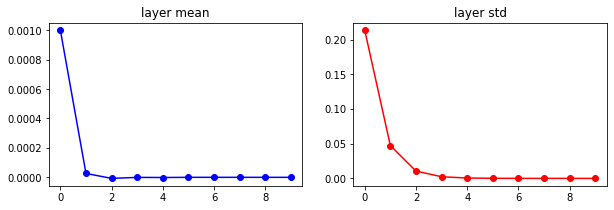

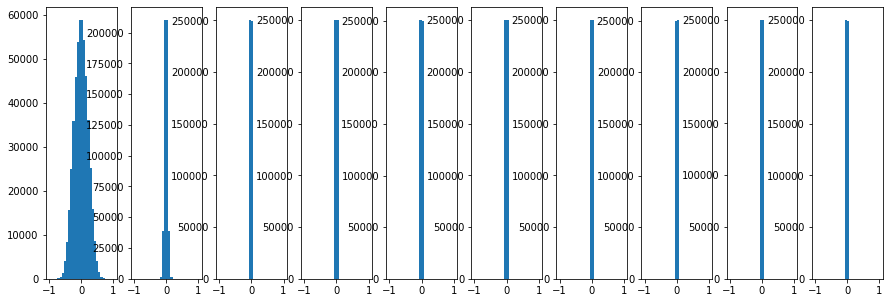

In [53]:
# 10-layer net with 500 neurons on each layer, using tanh non-linearities
# at each layer standard deviation decreases while all data is zero-centered
# therefore at the last layer data almost equals 0 
# so gradients = 0 => no learning 

# w ~ 0.01
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500] * 10 
nonlinearities = ['tanh']*len(hidden_layer_sizes)

act = {'relu':lambda x:np.maximum(0, x), 'tanh':lambda x:np.tanh(x)}
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] # input at this layer 
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) * 0.01 # layer initialization 
    
    H = np.dot(X, W) # matrix multiply 
    H = act[nonlinearities[i]](H) # nonlinearity (activation function)
    Hs[i] = H # cashe result on this layer 
    
# look at distributions at each layer 
print('input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i,H in Hs.items()]
layer_stds = [np.std(H) for i,H in Hs.items()] 
for i,H in Hs.items():
    print('hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i]))
    
# plot the means and standard deviations 
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

# plot the row distribution 
plt.figure(figsize=(15, 5))
for i,H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range=(-1, 1))
plt.show()

#### Conclusion 
Because of multi layer structure and low weight values at the last layer our data is very close to 0. In gradient chain we have derivative of linear function which is x => gradients ~= 0. There is almost no learning of this model

### High weights value problem

input layer had mean -0.001206 and std 1.000191
hidden layer 1 had mean 0.001157 and std 0.981844
hidden layer 2 had mean 0.000776 and std 0.981652
hidden layer 3 had mean 0.001667 and std 0.981447
hidden layer 4 had mean -0.004763 and std 0.981609
hidden layer 5 had mean -0.000389 and std 0.981744
hidden layer 6 had mean -0.002385 and std 0.981684
hidden layer 7 had mean 0.000437 and std 0.981357
hidden layer 8 had mean 0.000850 and std 0.981599
hidden layer 9 had mean -0.002237 and std 0.981977
hidden layer 10 had mean 0.002789 and std 0.981429


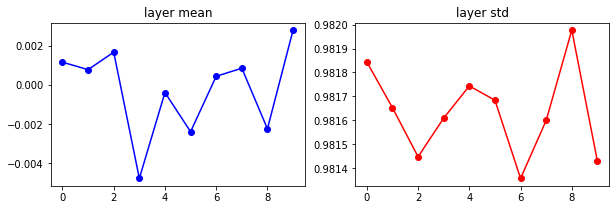

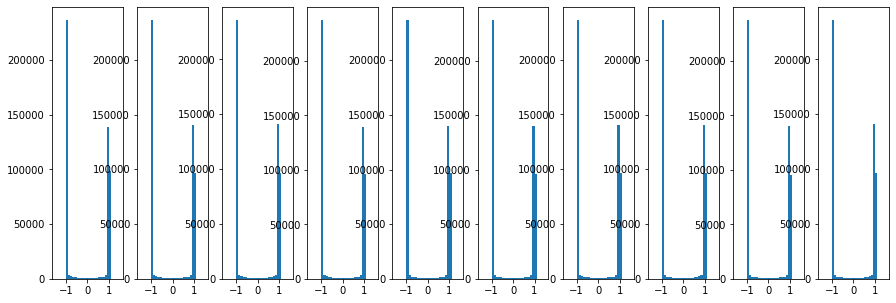

In [61]:
# w ~ 1.
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500] * 10 
nonlinearities = ['tanh']*len(hidden_layer_sizes)

act = {'relu':lambda x:np.maximum(0, x), 'tanh':lambda x:np.tanh(x)}
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] # input at this layer 
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) * 1. # layer initialization 
    
    H = np.dot(X, W) # matrix multiply 
    H = act[nonlinearities[i]](H) # nonlinearity (activation function)
    Hs[i] = H # cashe result on this layer 
    
# look at distributions at each layer 
print('input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i,H in Hs.items()]
layer_stds = [np.std(H) for i,H in Hs.items()] 
for i,H in Hs.items():
    print('hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i]))
    
# plot the means and standard deviations 
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

# plot the row distribution 
plt.figure(figsize=(15, 5))
for i,H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range=(-1.5, 1.5))
plt.show()

#### Conclusion 
Big weights => saturated regime (very negative / positive inputs => flat gradients).

As we can see on the last plot, tanh outputs are mostly either 1 or -1. This means that tanh() inputs are very negative / positive numbers => we have gradients = 0

### Xavier initialization
W = np.random.randn(in, out) / sqrt(in)

input layer had mean -0.000220 and std 1.000676
hidden layer 1 had mean -0.001077 and std 0.626885
hidden layer 2 had mean -0.000500 and std 0.486174
hidden layer 3 had mean -0.000671 and std 0.408153
hidden layer 4 had mean 0.000036 and std 0.358200
hidden layer 5 had mean 0.000139 and std 0.322637
hidden layer 6 had mean 0.000834 and std 0.295547
hidden layer 7 had mean -0.000435 and std 0.274145
hidden layer 8 had mean 0.000214 and std 0.255060
hidden layer 9 had mean 0.000212 and std 0.239612
hidden layer 10 had mean -0.000160 and std 0.228007


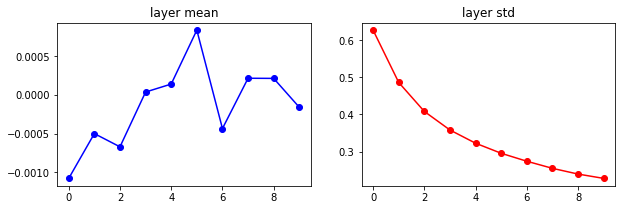

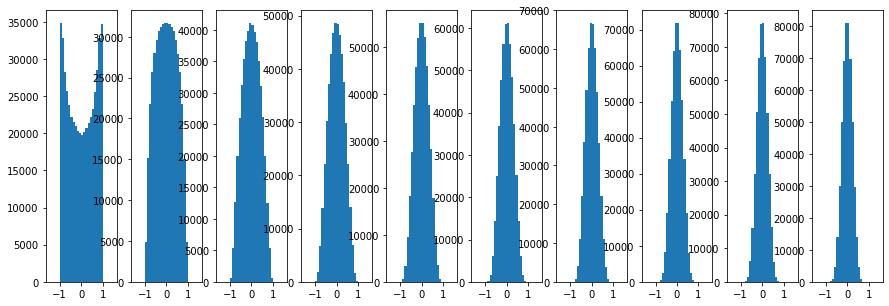

In [62]:
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500] * 10 
nonlinearities = ['tanh']*len(hidden_layer_sizes)

act = {'relu':lambda x:np.maximum(0, x), 'tanh':lambda x:np.tanh(x)}
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] # input at this layer 
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in) # layer initialization 
    
    H = np.dot(X, W) # matrix multiply 
    H = act[nonlinearities[i]](H) # nonlinearity (activation function)
    Hs[i] = H # cashe result on this layer 
    
# look at distributions at each layer 
print('input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i,H in Hs.items()]
layer_stds = [np.std(H) for i,H in Hs.items()] 
for i,H in Hs.items():
    print('hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i]))
    
# plot the means and standard deviations 
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

# plot the row distribution 
plt.figure(figsize=(15, 5))
for i,H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range=(-1.5, 1.5))
plt.show()

#### Conclusion 
If we have a small number of inputs then the weights should be higher. And the more inputs we have the smaller
weights are.  

### When using ReLU nonlinearity 

input layer had mean 0.000863 and std 0.999284
hidden layer 1 had mean 0.398568 and std 0.583410
hidden layer 2 had mean 0.294473 and std 0.426958
hidden layer 3 had mean 0.220203 and std 0.311601
hidden layer 4 had mean 0.153160 and std 0.221937
hidden layer 5 had mean 0.098505 and std 0.150836
hidden layer 6 had mean 0.068134 and std 0.103632
hidden layer 7 had mean 0.048989 and std 0.072151
hidden layer 8 had mean 0.034060 and std 0.050171
hidden layer 9 had mean 0.024282 and std 0.036029
hidden layer 10 had mean 0.017049 and std 0.024783


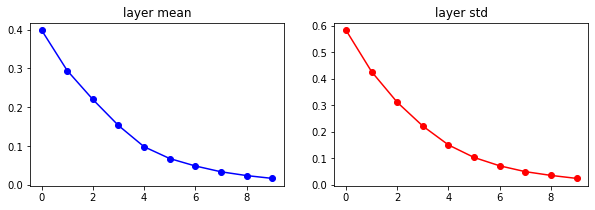

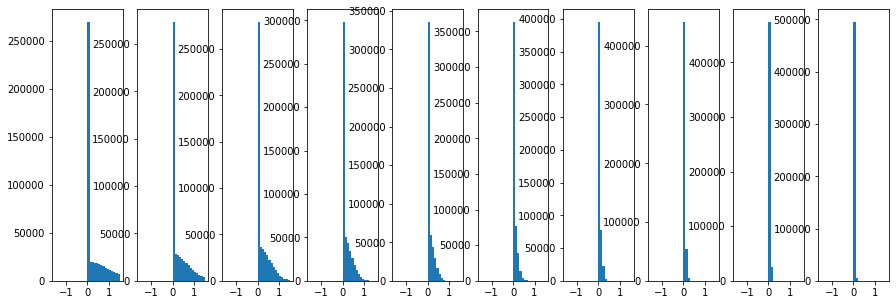

In [65]:
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500] * 10 
nonlinearities = ['relu']*len(hidden_layer_sizes)

act = {'relu':lambda x:np.maximum(0, x), 'tanh':lambda x:np.tanh(x)}
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] # input at this layer 
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in) # layer initialization 
    
    H = np.dot(X, W) # matrix multiply 
    H = act[nonlinearities[i]](H) # nonlinearity (activation function)
    Hs[i] = H # cashe result on this layer 
    
# look at distributions at each layer 
print('input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i,H in Hs.items()]
layer_stds = [np.std(H) for i,H in Hs.items()] 
for i,H in Hs.items():
    print('hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i]))
    
# plot the means and standard deviations 
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

# plot the row distribution 
plt.figure(figsize=(15, 5))
for i,H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range=(-1.5, 1.5))
plt.show()

#### Conclusion
ReLU destroys negative values so we lose the variance we watned to be remained 

Half of neurons are killed. We can divide the number of inputs by 2 and reach some sort of balance 
W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2)

input layer had mean -0.000467 and std 0.999944
hidden layer 1 had mean 0.562276 and std 0.824350
hidden layer 2 had mean 0.562837 and std 0.823581
hidden layer 3 had mean 0.588743 and std 0.844973
hidden layer 4 had mean 0.574959 and std 0.823161
hidden layer 5 had mean 0.542632 and std 0.803378
hidden layer 6 had mean 0.575782 and std 0.823241
hidden layer 7 had mean 0.572147 and std 0.873879
hidden layer 8 had mean 0.571018 and std 0.857172
hidden layer 9 had mean 0.555406 and std 0.824083
hidden layer 10 had mean 0.555802 and std 0.808062


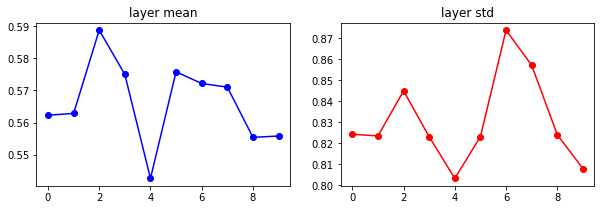

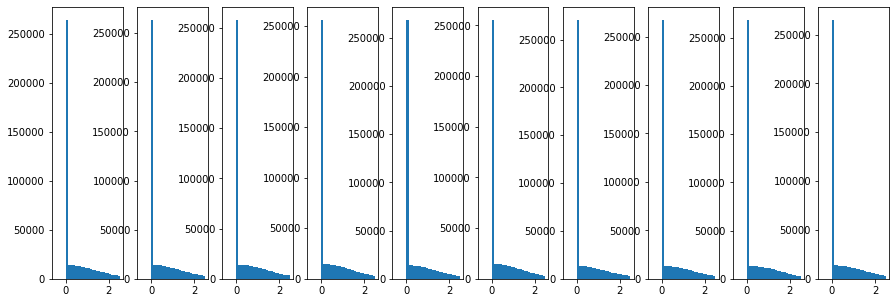

In [66]:
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500] * 10 
nonlinearities = ['relu']*len(hidden_layer_sizes)

act = {'relu':lambda x:np.maximum(0, x), 'tanh':lambda x:np.tanh(x)}
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1] # input at this layer 
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2) # layer initialization 
    
    H = np.dot(X, W) # matrix multiply 
    H = act[nonlinearities[i]](H) # nonlinearity (activation function)
    Hs[i] = H # cashe result on this layer 
    
# look at distributions at each layer 
print('input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i,H in Hs.items()]
layer_stds = [np.std(H) for i,H in Hs.items()] 
for i,H in Hs.items():
    print('hidden layer %d had mean %f and std %f' % (i+1, layer_means[i], layer_stds[i]))
    
# plot the means and standard deviations 
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

# plot the row distribution 
plt.figure(figsize=(15, 5))
for i,H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range=(-0.5, 2.5))
plt.show()

### Some literature 
<img src="./data/literature.png" width='700' height='700'>

## Batch Normalization 

Idea: Distribution of each layer’s inputs changes during training. We refer to this phenomenon as internal covariate shift, and address the problem by normalizing layer inputs.

Consider a mini-batch B of size m. Since the normalization is applied to each activation independently, let us
focus on a particular activation x(k) and omit k for clarity. We have m values of this activation in the minibatch,
B = {x1...m}.
Let the normalized values be ̂x1...m, and their linear transformations be y1...m. We refer to the transform BNγ,β : x1...m →y1...m as the Batch Normalizing Transform. We present the BN Transform in Algorithm 1. In the algorithm, ǫ is a constant added to the mini-batch variance for numerical stability.
<img src="./data/BN1.png" width='600' height='600'> 
How we get x_hat: we subtract mean and then divide by std like shown in "Data preprocessing" block.

These parameters are learned along with the original model parameters, and restore the representation power of the network. Indeed, by setting γ(k) = √Var[x(k)] and β(k) = E[x(k)], we could recover the original activations, if that were the optimal thing to do.

If gamma = sqrt(var(x)) and beta = mean(x), the original activation is restored. This is, what makes BatchNorm really powerful. We initialize the BatchNorm Parameters to transform the input to zero mean/unit variance distributions but during training they can learn that any other distribution might be better.

Though in practice γ and β are learned so they do not save the map's identity. Applying them we get something different than x_hat which is useful in training 

And then we use chain rule to compute gradients of internal parameters:
<img src="./data/BN1backprop.png" width='600' height='600'>

<h4>Note:</h4>

At test time Norm layer functions differently. The mean and std are not computed based on the batch. Instead, a single fixed empirical mean of activations during training is used. 

### How it works in details 

Fulll guide can be found here: 

`https://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html`
<img src="./data/BNcircuit.png" width='800' height='800'>

<h4>Computation explanations</h4>

From input x we calculate the mean of every dimension in the feature space and then subtract this vector of mean values from every training example. With this done, following the lower branch, we calculate the per-dimension variance and with that the entire denominator of the normalization equation. Next we invert it and multiply it with difference of inputs and means and we have x_normalized. The last two blobs on the right perform the squashing by multiplying with the input gamma and finally adding beta. Et voilà, we have our Batch-Normalized output

<h4>Vanila implementation</h4>

In [2]:
import numpy as np 
# prepare data 
X = np.random.randn(4, 5)
print(X)

[[-0.69530094  0.74138092 -0.67351258 -0.32126404  0.12275799]
 [ 1.3102272   1.38190378 -0.47543555 -2.114771   -0.30746036]
 [-0.1385263   0.33048623  2.34559489 -0.35839961  1.01251272]
 [ 1.73647482  0.05066192  0.65039439 -0.64995081 -0.11485819]]


In [33]:
def batchnorm_forward(x, gamma, beta, eps):
    # y = γ*x_hat + β
    # eps is some noise in normalize formula 
    
    # print('Input data is\n', x)

    N, D = x.shape
    # print(f'Our input data is {N}x{D}')
    
    #step1: calculate mean
    mu = 1./N * np.sum(x, axis = 0)
    # print('The mean (for each dimension) vector is\n', mu)

    #step2: subtract mean vector of every trainings example
    xmu = x - mu

    #step3: following the lower branch - calculation denominator
    sq = xmu ** 2

    #step4: calculate variance
    var = 1./N * np.sum(sq, axis = 0)

    #step5: add eps for numerical stability, then sqrt
    sqrtvar = np.sqrt(var + eps)

    #step6: invert sqrtwar
    ivar = 1./sqrtvar

    #step7: execute normalization
    xhat = xmu * ivar
    # print('Normalized data is\n', xhat)

    #step8: Nor the two transformation steps
    gammax = gamma * xhat

    #step9
    out = gammax + beta

    #store intermediate
    cache = (xhat,gamma,xmu,ivar,sqrtvar,var,eps)

    return out, cache

In [12]:
X_nb, cache = batchnorm_forward(X, 1, 0, 0.5)

Input data is
 [[-0.69530094  0.74138092 -0.67351258 -0.32126404  0.12275799]
 [ 1.3102272   1.38190378 -0.47543555 -2.114771   -0.30746036]
 [-0.1385263   0.33048623  2.34559489 -0.35839961  1.01251272]
 [ 1.73647482  0.05066192  0.65039439 -0.64995081 -0.11485819]]
Our input data is 4x5
The mean (for each dimension) vector is
 [ 0.55321869  0.62610821  0.46176029 -0.86109636  0.17823804]
Normalized data is
 [[-1.01852379  0.13303795 -0.81552013  0.52932335 -0.06384085]
 [ 0.61755631  0.8722749  -0.67323204 -1.22926921 -0.55889272]
 [-0.5643153  -0.34118173  1.35324738  0.4929107   0.95999914]
 [ 0.96528279 -0.66413113  0.13550479  0.20703516 -0.33726557]]


#### Visualization 

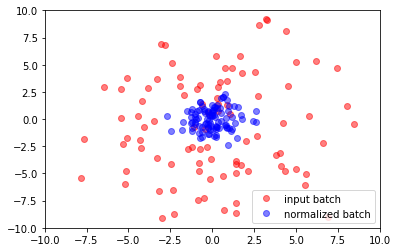

In [44]:
import matplotlib.pyplot as plt 
# random data 
X = np.random.randn(100, 2) * 5

# normalized data
X_bn, cache = batchnorm_forward(X, 1, 0, 1)
plt.plot(X[:, [0]], X[:, [1]], 'ro', alpha=0.5) # input batch
plt.plot(X_bn[:, [0]], X_bn[:, [1]], 'bo', alpha=0.5) # normalized batch 
plt.legend(['input batch', 'normalized batch'])
plt.axis([-10, 10, -10, 10])
plt.show()

#### Backward pass
<img src="./data/BNcircuit.png" width='800' height='800'>

In [ ]:
def batchnorm_backward(dout, cache):

    #unfold the variables stored in cache
    xhat,gamma,xmu,ivar,sqrtvar,var,eps = cache

    #get the dimensions of the input/output
    N,D = dout.shape

    #step9
    dbeta = np.sum(dout, axis=0)
    dgammax = dout #not necessary, but more understandable

    #step8
    dgamma = np.sum(dgammax*xhat, axis=0)
    dxhat = dgammax * gamma

    #step7
    divar = np.sum(dxhat*xmu, axis=0)
    dxmu1 = dxhat * ivar

    #step6
    dsqrtvar = -1. /(sqrtvar**2) * divar

    #step5
    dvar = 0.5 * 1. /np.sqrt(var+eps) * dsqrtvar

    #step4
    dsq = 1. /N * np.ones((N,D)) * dvar

    #step3
    dxmu2 = 2 * xmu * dsq

    #step2
    dx1 = (dxmu1 + dxmu2)
    dmu = -1 * np.sum(dxmu1+dxmu2, axis=0)

    #step1
    dx2 = 1. /N * np.ones((N,D)) * dmu

    #step0
    dx = dx1 + dx2

    return dx, dgamma, dbeta